# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. The requirement is to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

### Business Goal 

The end requirement is to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


## Kindly Note
If you attempt to "Restart and Run All", you may find that the execution stops at cell 42. That's intentional. <br>
You are requested to kindly run all the subsequent cells in the notebook manually. 

### 1. Data Understanding, Exploration & Preparation

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
# importing libraries and modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# tweaking dataframe view options in Pandas
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
# reading our dataset
df = pd.read_csv('train.csv')

In [4]:
# understanding columns, their data-types and values present in them
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# seeking to see the first 5 rows in our dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# understanding statistical measures of data-values present in numerical columns
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# columns present in our dataset
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df.shape # gives the number of rows and columns present as a tuple

(1460, 81)

### Understanding the unique values/classes of values present in each qualifying attribute

In [9]:
df.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [10]:
df.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [11]:
df.BsmtCond.unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [12]:
df.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [13]:
df.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [14]:
df.BsmtFinType2.unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [15]:
df.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [16]:
df.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [17]:
df.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [18]:
df.GarageYrBlt.unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [19]:
df.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [20]:
df.GarageQual.unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [21]:
df.GarageCond.unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [22]:
df.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [23]:
df.Fence.unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [24]:
df.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [25]:
df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [26]:
df.MasVnrArea.unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [27]:
# Id --> drop it
# Lot-frontage --> impute with median
# Alley --> change all NaN to NA
# MasVnrType --> drop all NaNs
# MasVnrArea --> drop all NaNs
# BsmtQual --> change all NaN to NA
# BsmtCond --> change all NaN to NA
# BsmtExposure --> drop the one row which has basement condition not as NaN, but basement exposure as NaN, 
                # change all NaNs to NA
# BsmtFinType1 --> change all NaNs to NA
# BsmtFinType2 --> change all NaNs to NA (even though there's mismatch -- 1423 vs 1422 -- the one extra NaN in BsmtFinType2 could simply that particular basement has no additional type)
# Electrical --> drop the one NaN
# FireplaceQu --> change all NaNs to NA
# GarageType --> change all NaNs to NA
# GarageYrBlt --> change all NaNs to -1
# GarageFinish --> change all NaNs to NA
# GarageQual --> change all NaNs to NA
# GarageCond --> change all NaNs to NA
# PoolQC --> drop the column, changing all to NaN wouldn't really help much anyways as very high number of NaNs
# Fence --> change all NaNs to NA
# MiscFeature --> drop the column, too many NaNs to prove useful

### Data Cleaning and Correction

In [28]:
# change all NaNs to NA 
def change_all_nans_to_na (column_to_change):
    column_to_change.fillna("NA", inplace=True)

# change all NaNs to -1
def change_all_nans_to_minus_1 (column_to_change):
    column_to_change.fillna(-1, inplace=True)

In [29]:
change_all_nans_to_na(df['Alley'])
change_all_nans_to_na(df['BsmtQual'])
change_all_nans_to_na(df['BsmtCond'])
change_all_nans_to_na(df['BsmtExposure'])
change_all_nans_to_na(df['BsmtFinType1'])
change_all_nans_to_na(df['BsmtFinType2'])
change_all_nans_to_na(df['FireplaceQu'])
change_all_nans_to_na(df['GarageType'])
change_all_nans_to_na(df['GarageFinish'])
change_all_nans_to_na(df['GarageQual'])
change_all_nans_to_na(df['GarageCond'])
change_all_nans_to_na(df['Fence'])

change_all_nans_to_minus_1(df['GarageYrBlt'])

In [30]:
# imputing missing values in LotFrontage with column median
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True) 

In [31]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NA,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NA,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NA,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NA,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NA,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NA,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,69.0,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NA,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NA,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0

In [32]:
# dropping PoolQc, MisFeature and Id columns
df.drop(['PoolQC', 'MiscFeature', 'Id'], axis=1, inplace=True)

In [33]:
df.dropna(inplace=True) # dropping nan value rows from MasVnrTrpe, MasVnrArea & Electrical

In [34]:
df.columns # updated view of columns present

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [35]:
df.shape

(1451, 78)

### Plotting numerical features of our dataset to mine for insights/actions forward

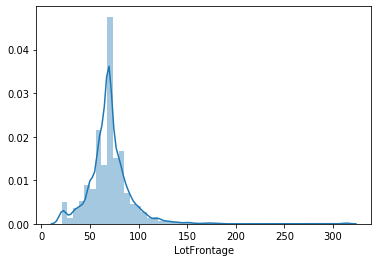

In [36]:
sns.distplot(df['LotFrontage'])
plt.show()

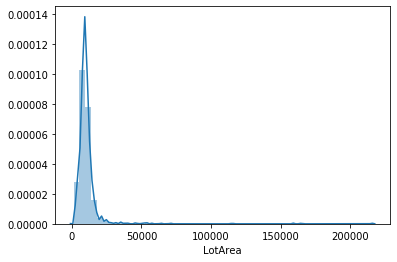

In [37]:
sns.distplot(df['LotArea'])
plt.show()

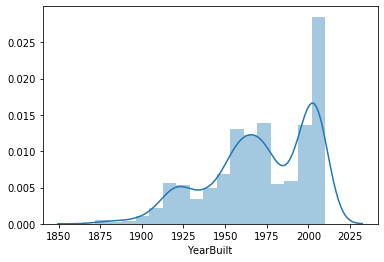

In [38]:
sns.distplot(df['YearBuilt'])
plt.show()

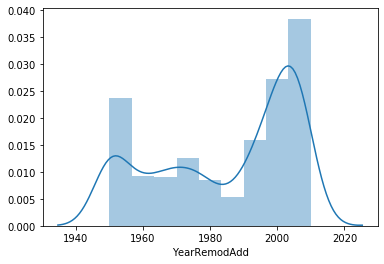

In [39]:
sns.distplot(df['YearRemodAdd'])
plt.show()

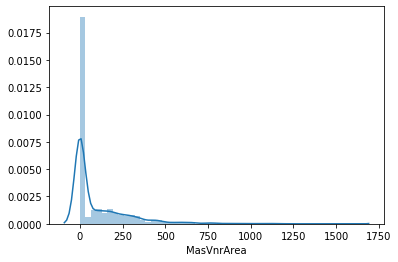

In [40]:
sns.distplot(df['MasVnrArea']) 
plt.show()

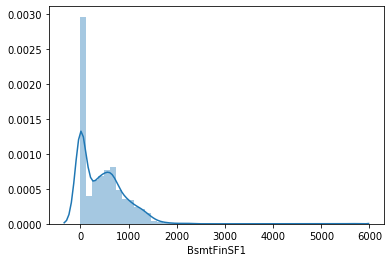

In [41]:
sns.distplot(df['BsmtFinSF1'])
plt.show()

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

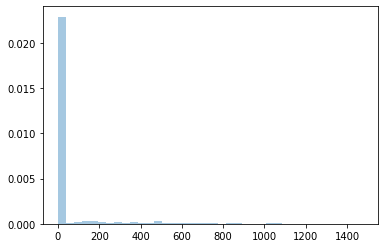

In [42]:
sns.distplot(df['BsmtFinSF2']) # drop it
plt.show()

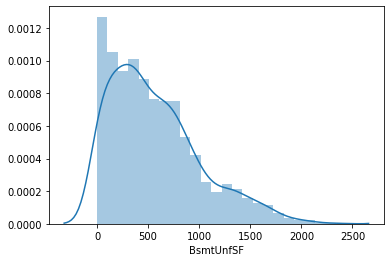

In [43]:
sns.distplot(df['BsmtUnfSF']) 
plt.show()

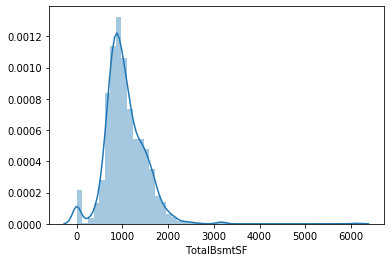

In [44]:
sns.distplot(df['TotalBsmtSF']) 
plt.show()

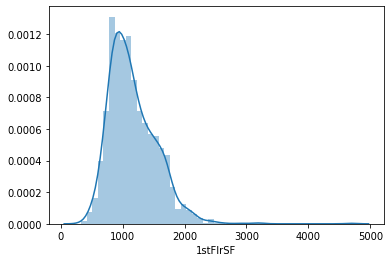

In [45]:
sns.distplot(df['1stFlrSF']) 
plt.show()

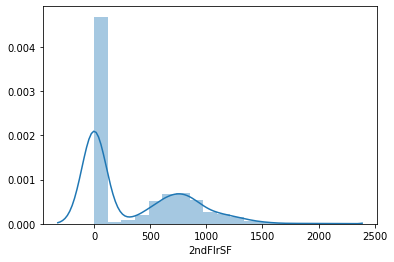

In [46]:
sns.distplot(df['2ndFlrSF']) 
plt.show()

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

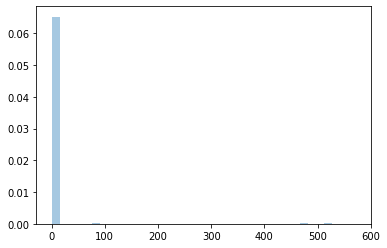

In [47]:
sns.distplot(df['LowQualFinSF']) # drop it
plt.show()

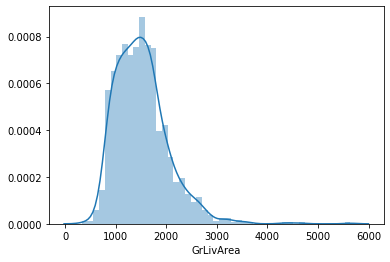

In [48]:
sns.distplot(df['GrLivArea']) 
plt.show()

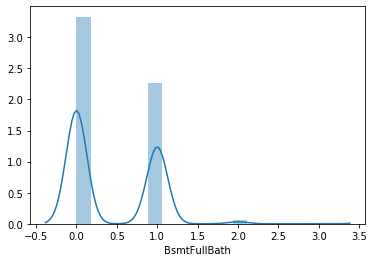

In [49]:
sns.distplot(df['BsmtFullBath']) # seems a categorical variable
plt.show()

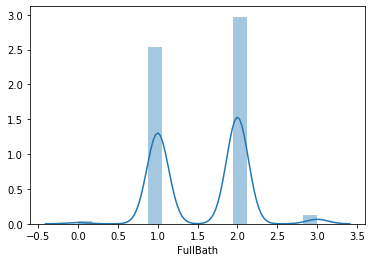

In [50]:
sns.distplot(df['FullBath']) # categorical
plt.show()

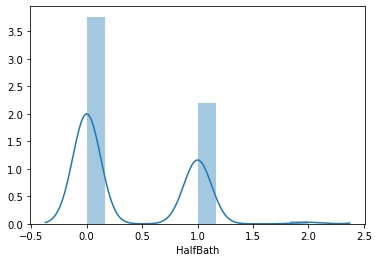

In [51]:
sns.distplot(df['HalfBath']) # categorical
plt.show()

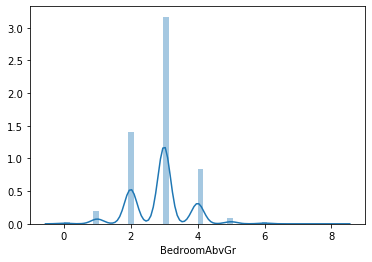

In [52]:
sns.distplot(df['BedroomAbvGr']) # categorical
plt.show()

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

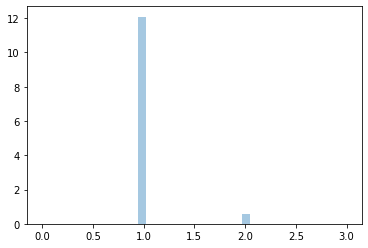

In [53]:
sns.distplot(df['KitchenAbvGr']) # drop it
plt.show()

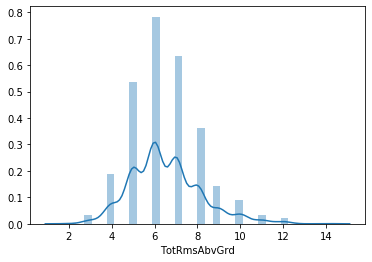

In [54]:
sns.distplot(df['TotRmsAbvGrd'])  # categorical - suitable candidate for binning
plt.show()

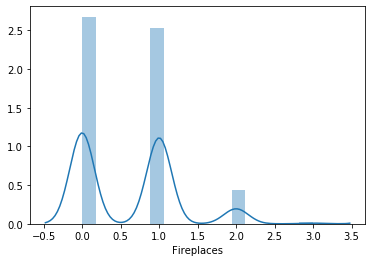

In [55]:
sns.distplot(df['Fireplaces']) # categorical
plt.show()

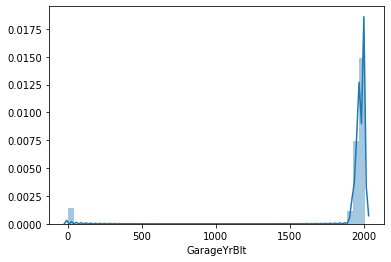

In [56]:
sns.distplot(df['GarageYrBlt']) 
plt.show()

In [57]:
df['GarageYrBlt'].value_counts() # could be binned into before 2000 and after 2000

-1.0       81
 2005.0    65
 2006.0    58
 2004.0    53
 2003.0    49
           ..
 1906.0    1 
 1927.0    1 
 1900.0    1 
 1908.0    1 
 1933.0    1 
Name: GarageYrBlt, Length: 98, dtype: int64

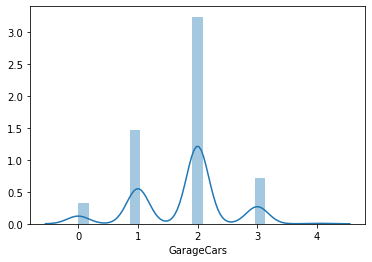

In [58]:
sns.distplot(df['GarageCars']) # categorical
plt.show()

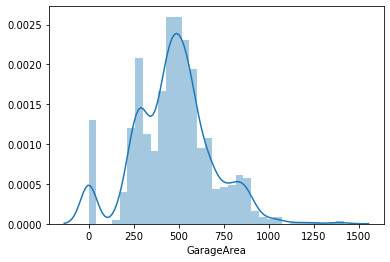

In [59]:
sns.distplot(df['GarageArea']) 
plt.show()

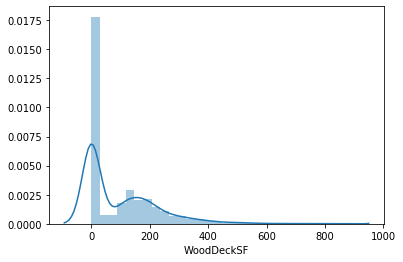

In [60]:
sns.distplot(df['WoodDeckSF']) 
plt.show()

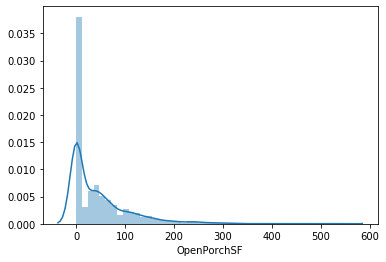

In [61]:
sns.distplot(df['OpenPorchSF']) # safe to drop
plt.show()

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

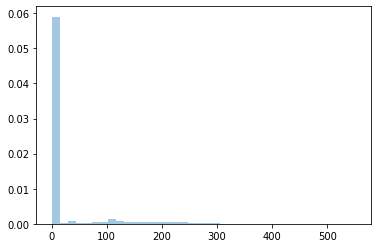

In [62]:
sns.distplot(df['EnclosedPorch']) # drop
plt.show()

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

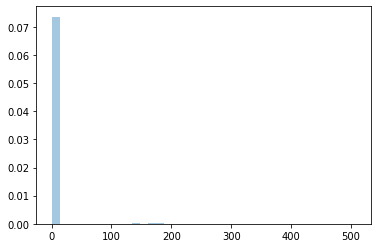

In [63]:
sns.distplot(df['3SsnPorch']) # drop it
plt.show()

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

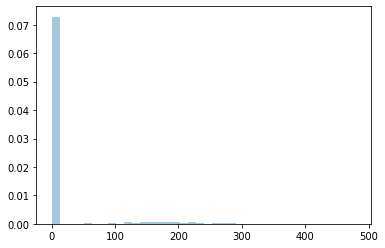

In [64]:
sns.distplot(df['ScreenPorch']) # drop it
plt.show()

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

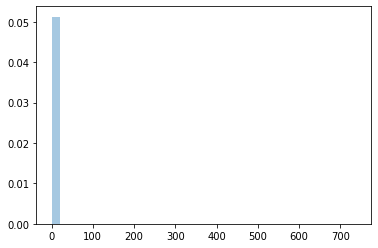

In [65]:
sns.distplot(df['PoolArea']) # drop it
plt.show()

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

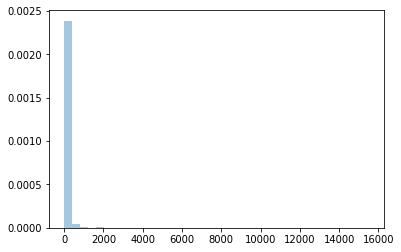

In [66]:
sns.distplot(df['MiscVal']) # drop it
plt.show()

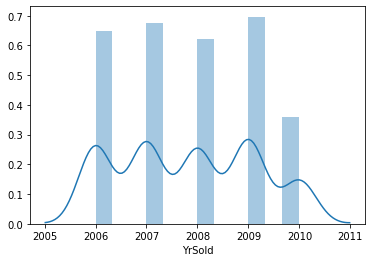

In [67]:
sns.distplot(df['YrSold']) # categorical
plt.show()

In [68]:
# drop columns
df.drop(['LowQualFinSF', 'KitchenAbvGr', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MasVnrArea'], axis=1, inplace=True)

In [69]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'Fence', 'MoSold', 'YrSold', 'SaleType',
 

In [70]:
# binning values of GarageYrBlt column
df['GarageYrBlt'] = df['GarageYrBlt'].apply(lambda x : 'After 2000' if x >= 2000 else 'Before 2000' )

In [71]:
# binning values of TotRmsAbvGrd column
def binTotRoomsAbvGrd (x):
    if x <= 5:
        return 'Low'
    elif x >=6 and x <= 10:
        return 'Medium'
    else:
        return 'High'
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].apply(lambda x : binTotRoomsAbvGrd(x))

In [72]:
df[['GarageYrBlt', 'TotRmsAbvGrd']] # gives the new binned view of GarageYrBlt & TotRmsAbvGrd colums

,GarageYrBlt,TotRmsAbvGrd
0,After 2000,Medium
1,Before 2000,Medium
2,After 2000,Medium
3,Before 2000,Medium
4,After 2000,Medium
...,...,...
1455,Before 2000,Medium
1456,Before 2000,Medium
1457,Before 2000,Medium
1458,Before 2000,Low


### Constructing a correlation matrix for numerical features of our dataset

In [73]:
# all numeric (float and int) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,GarageArea,WoodDeckSF,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,706,0,150,856,856,854,1710,1,0,2,1,3,0,2,548,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,978,0,284,1262,1262,0,1262,0,1,2,0,3,1,2,460,298,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,486,0,434,920,920,866,1786,1,0,2,1,3,1,2,608,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,216,0,540,756,961,756,1717,1,0,1,0,3,1,3,642,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,655,0,490,1145,1145,1053,2198,1,0,2,1,4,1,3,836,192,12,2008,250000


In [74]:
# correlation matrix
cor = df_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,GarageArea,WoodDeckSF,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.355068,-0.138039,0.034799,-0.061147,0.027979,0.040664,-0.069241,-0.066037,-0.138789,-0.236547,-0.249775,0.307931,0.077025,0.004115,-0.002542,0.136051,0.175813,-0.021715,-0.044127,-0.039167,-0.098027,-0.012652,-0.013659,-0.021583,-0.082760
LotFrontage,-0.355068,1.000000,0.304694,0.233277,-0.053026,0.116365,0.082885,0.215778,0.042811,0.121921,0.363310,0.414725,0.073332,0.368035,0.091347,-0.006798,0.179134,0.047830,0.236903,0.233830,0.268685,0.323181,0.074495,0.009784,0.007310,0.333206
LotArea,-0.138039,0.304694,1.000000,0.106305,-0.002297,0.015708,0.015190,0.213081,0.111674,-0.004250,0.258538,0.295977,0.052979,0.261152,0.157695,0.048365,0.122526,0.016364,0.117788,0.269677,0.154761,0.180767,0.173170,0.003177,-0.012969,0.264668
OverallQual,0.034799,0.233277,0.106305,1.000000,-0.090940,0.572129,0.550499,0.236421,-0.058211,0.309461,0.536836,0.476645,0.299021,0.594431,0.108108,-0.039348,0.552939,0.272338,0.106013,0.400090,0.600055,0.560502,0.240728,0.068514,-0.025116,0.790085
OverallCond,-0.061147,-0.053026,-0.002297,-0.090940,1.000000,-0.376557,0.075545,-0.042292,0.039234,-0.137104,-0.167932,-0.139260,0.027720,-0.076631,-0.051877,0.117217,-0.190170,-0.061030,0.014334,-0.020470,-0.184777,-0.151204,-0.004514,-0.004210,0.043487,-0.076361
YearBuilt,0.027979,0.116365,0.015708,0.572129,-0.376557,1.000000,0.590324,0.250209,-0.047609,0.150218,0.394285,0.285655,0.009036,0.199621,0.187085,-0.036897,0.469310,0.239672,-0.068781,0.151023,0.537508,0.478948,0.226960,0.009756,-0.014559,0.523274
YearRemodAdd,0.040664,0.082885,0.015190,0.550499,0.075545,0.590324,1.000000,0.128422,-0.066485,0.182219,0.292985,0.243464,0.139804,0.288569,0.118850,-0.011137,0.440011,0.180316,-0.038566,0.115594,0.419764,0.371088,0.207514,0.018959,0.035263,0.507488
BsmtFinSF1,-0.069241,0.215778,0.213081,0.236421,-0.042292,0.250209,0.128422,1.000000,-0.049498,-0.496605,0.520098,0.442838,-0.135330,0.205944,0.647159,0.068473,0.056371,0.002778,-0.105617,0.257828,0.222531,0.295374,0.205447,-0.016387,0.016969,0.383995
BsmtFinSF2,-0.066037,0.042811,0.111674,-0.058211,0.039234,-0.047609,-0.066485,-0.049498,1.000000,-0.209806,0.106092,0.098654,-0.099445,-0.008956,0.160068,0.070547,-0.075366,-0.031261,-0.015990,0.047318,-0.037494,-0.017641,0.067684,-0.014977,0.031880,-0.010350
BsmtUnfSF,-0.138789,0.121921,-0.004250,0.309461,-0.137104,0.150218,0.182219,-0.496605,-0.209806,1.000000,0.415900,0.318053,0.006341,0.240770,-0.422586,-0.096020,0.288771,-0.038740,0.165986,0.052743,0.214645,0.183865,-0.004180,0.033297,-0.040340,0.215707


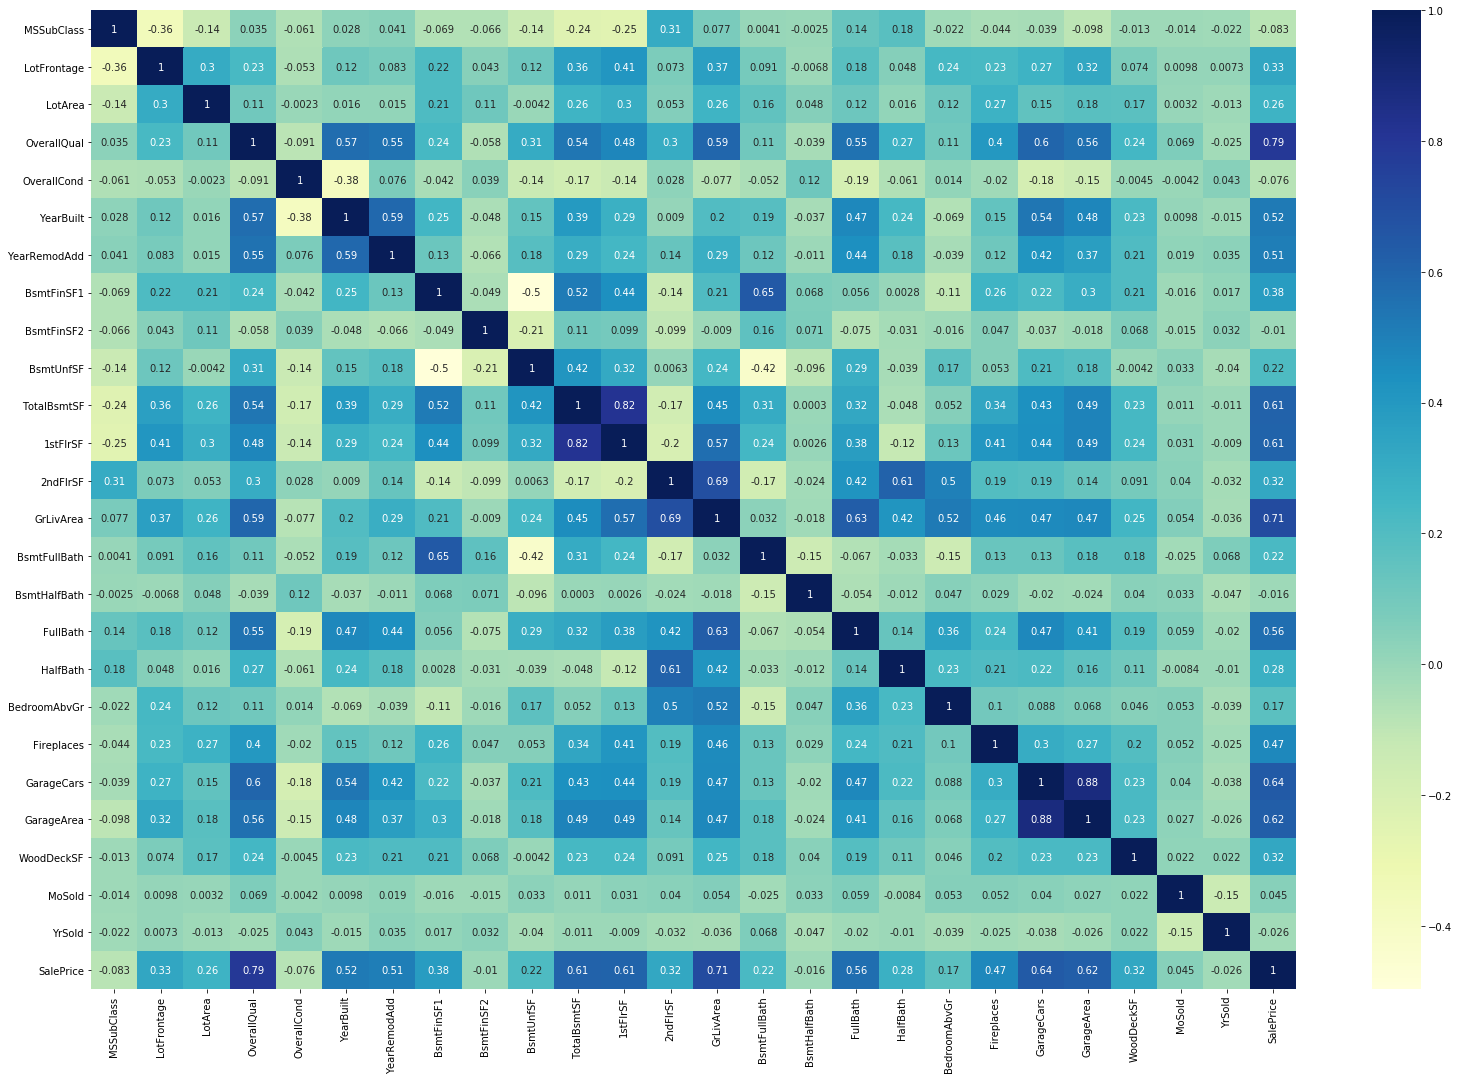

In [75]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(27,18))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

## Binning Categorical Variables

### Converting all numerical variables, that are essentially categorical, into datatype "object"

In [76]:
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')
df['BsmtFullBath'] = df['BsmtFullBath'].astype('object')
df['BsmtHalfBath'] = df['BsmtHalfBath'].astype('object')
df['FullBath'] = df['FullBath'].astype('object')
df['HalfBath'] = df['HalfBath'].astype('object')
df['BedroomAbvGr'] = df['BedroomAbvGr'].astype('object')
df['Fireplaces'] = df['Fireplaces'].astype('object')
df['GarageCars'] = df['GarageCars'].astype('object')
df['YrSold'] = df['YrSold'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   object 
 1   MSZoning       1451 non-null   object 
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   Alley          1451 non-null   object 
 6   LotShape       1451 non-null   object 
 7   LandContour    1451 non-null   object 
 8   Utilities      1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   object 
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  Condition2     1451 non-null   object 
 14  BldgType       1451 non-null   object 
 15  HouseStyle     1451 non-null   object 
 16  OverallQual    1451 non-null   object 
 17  OverallCond    1451 non-null   object 
 18  YearBuil

In [77]:
# split into X and y
X = df.loc[:, df.columns != 'SalePrice'] # predictors in variable X

y = df['SalePrice'] # response variable in Y

In [78]:
# creating dummy variables for categorical variables

# subset all categorical variables
df_categorical = X.select_dtypes(include=['object'])
df_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,Fence,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,Gd,Medium,Typ,0,NA,Attchd,After 2000,RFn,2,TA,TA,Y,NA,2008,WD,Normal
1,20,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,TA,Medium,Typ,1,TA,Attchd,Before 2000,RFn,2,TA,TA,Y,NA,2007,WD,Normal
2,60,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,Gd,Medium,Typ,1,TA,Attchd,After 2000,RFn,2,TA,TA,Y,NA,2008,WD,Normal
3,70,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,3,Gd,Medium,Typ,1,Gd,Detchd,Before 2000,Unf,3,TA,TA,Y,NA,2006,WD,Abnorml
4,60,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,4,Gd,Medium,Typ,1,TA,Attchd,After 2000,RFn,3,TA,TA,Y,NA,2008,WD,Normal


In [79]:
# convert into dummies - one hot encoding
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_Low,TotRmsAbvGrd_Medium,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageYrBlt_Before 2000,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_P

In [80]:
df_dummies.shape

(1451, 278)

In [81]:
# drop categorical variables 
X = X.drop(list(df_categorical.columns), axis=1)

In [82]:
X.shape

(1451, 14)

### Scaling the features in our now updated X before we concat dummy variables to them

This is done so that we can use RFE & subsequently apply Ridge/Lasso Regression

In [83]:
# scaling the features - necessary before using RFE & Ridge or Lasso 
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'MoSold'],
      dtype='object')

In [84]:
# resetting index to solve for the issue of rows increasing, when using pd.concat
X.reset_index(inplace=True)
df_dummies.reset_index(inplace=True)

In [85]:
df_dummies.shape

(1451, 279)

In [86]:
# concat dummy variables with X
X = pd.concat([X, df_dummies], axis=1)

In [87]:
X.head()

,index,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,MoSold,index,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_Low,TotRmsAbvGrd_Medium,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageYrBlt_Before 2000,

In [88]:
X.shape

(1451, 294)

## 2. Model Building and Evaluation

## Feature Selection using RFE

In [89]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [90]:
# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()
lm.fit(X, y)

rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X, y)

In [91]:
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('index', False, 228),
 ('LotFrontage', False, 244),
 ('LotArea', False, 81),
 ('YearBuilt', False, 42),
 ('YearRemodAdd', False, 180),
 ('BsmtFinSF1', False, 70),
 ('BsmtFinSF2', False, 211),
 ('BsmtUnfSF', False, 247),
 ('TotalBsmtSF', False, 61),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', False, 5),
 ('GrLivArea', False, 136),
 ('GarageArea', False, 97),
 ('WoodDeckSF', False, 246),
 ('MoSold', False, 240),
 ('index', False, 229),
 ('MSSubClass_30', False, 226),
 ('MSSubClass_40', False, 207),
 ('MSSubClass_45', False, 168),
 ('MSSubClass_50', False, 117),
 ('MSSubClass_60', False, 225),
 ('MSSubClass_70', False, 224),
 ('MSSubClass_75', False, 221),
 ('MSSubClass_80', False, 119),
 ('MSSubClass_85', False, 108),
 ('MSSubClass_90', False, 26),
 ('MSSubClass_120', False, 216),
 ('MSSubClass_160', False, 175),
 ('MSSubClass_180', False, 128),
 ('MSSubClass_190', False, 69),
 ('MSZoning_FV', False, 20),
 ('MSZoning_RH', False, 30),
 ('MSZoning_RL', False, 22),
 ('MSZoning_RM', False, 31),


In [92]:
col = X.columns[rfe.support_]
col

Index(['1stFlrSF', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr',
       'Condition2_PosN', 'Condition2_RRAe', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'OverallCond_9', 'RoofStyle_Shed', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NA', 'BsmtQual_TA',
       'BsmtCond_NA', 'BsmtFinType1_NA', 'Functional_Sev', 'SaleType_Con',
       'SaleType_New'],
      dtype='object')

In [93]:
X.columns[~rfe.support_]

Index(['index', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=264)

In [94]:
X = X[col]

In [95]:
X.shape

(1451, 30)

In [96]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Linear Regression

In [97]:
# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-326300.55124376895
[ 2.66936643e+04  7.25335173e+04  6.80150972e+03 -3.67675829e+05
 -1.01135811e-09  4.59417338e+04  1.10285328e+05  1.76680822e+05
  3.40983432e+04  3.56407336e+04  4.48141219e+04  4.77330953e+04
  8.17214289e+04  8.40418187e+04  5.00207604e+05  1.16415322e-10
  5.47983460e+05  5.09144918e+05  5.04286328e+05  4.80811027e+05
  5.17199439e+05 -7.64243966e+04 -2.60149452e+04 -3.18066468e+04
 -6.37441398e+04 -3.18066468e+04 -3.18066468e+04 -7.81156581e+04
  5.90936326e+04  3.06577960e+04]


In [99]:
from sklearn.metrics import r2_score, mean_squared_error

In [100]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = {}
r2_train_lr = r2_score(y_train, y_pred_train)
metric["R2 Score - Train"] = r2_train_lr

r2_test_lr = r2_score(y_test, y_pred_test)
metric["R2 Score - Test"] = r2_test_lr

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric["RSS Score - Train"] = rss1_lr

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric["RSS Score - Test"] = rss2_lr

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric["MSE Score - Train"] = mse_train_lr**0.5

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric["MSE Score - Test"] = mse_test_lr**0.5
pd.DataFrame(metric, index=[0])

,R2 Score - Train,R2 Score - Test,RSS Score - Train,RSS Score - Test,MSE Score - Train,MSE Score - Test
0,0.781279,0.613819,1.390632e+12,1.066149e+12,37014.595814,49449.944176


## Ridge and Lasso Regression


## Ridge Regression

In [101]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [102]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [103]:
#Fitting Ridge model for alpha = 2.0 and printing coefficients which have been penalised
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 23328.54039048  74797.9692309   11305.4389193  -96897.81661309
      0.          47797.28767519 107923.02030299 120388.63774406
  28575.61599347  28438.82827732  37098.98422303  37818.32763161
  73173.95484161  26162.18822849  37092.36073905      0.
  27500.02636824  14378.97510538  32461.77475288  25731.18494093
  49108.38108182 -72984.43106815 -27071.52642721 -31434.35450942
 -64639.39200938 -31434.35450942 -31434.35450942 -22480.82953711
  29087.76685127  25502.81587478]


Feature: 0, Score: 23328.54039
Feature: 1, Score: 74797.96923
Feature: 2, Score: 11305.43892
Feature: 3, Score: -96897.81661
Feature: 4, Score: 0.00000
Feature: 5, Score: 47797.28768
Feature: 6, Score: 107923.02030
Feature: 7, Score: 120388.63774
Feature: 8, Score: 28575.61599
Feature: 9, Score: 28438.82828
Feature: 10, Score: 37098.98422
Feature: 11, Score: 37818.32763
Feature: 12, Score: 73173.95484
Feature: 13, Score: 26162.18823
Feature: 14, Score: 37092.36074
Feature: 15, Score: 0.00000
Feature: 16, Score: 27500.02637
Feature: 17, Score: 14378.97511
Feature: 18, Score: 32461.77475
Feature: 19, Score: 25731.18494
Feature: 20, Score: 49108.38108
Feature: 21, Score: -72984.43107
Feature: 22, Score: -27071.52643
Feature: 23, Score: -31434.35451
Feature: 24, Score: -64639.39201
Feature: 25, Score: -31434.35451
Feature: 26, Score: -31434.35451
Feature: 27, Score: -22480.82954
Feature: 28, Score: 29087.76685
Feature: 29, Score: 25502.81587


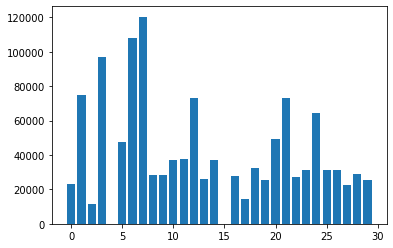

In [104]:
# representing importance of model features as a bar plot
importance = ridge.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], abs(importance))
plt.show()

In [105]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = {}
r2_train_lr = r2_score(y_train, y_pred_train)
metric2["R2 Score - Train"] = r2_train_lr

r2_test_lr = r2_score(y_test, y_pred_test)
metric2["R2 Score - Test"] = r2_test_lr

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric2["RSS Score - Train"] = rss1_lr

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric2["RSS Score - Test"] = rss2_lr

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric2["MSE Score - Train"] = mse_train_lr**0.5

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric2["MSE Score - Test"] = mse_test_lr**0.5
pd.DataFrame(metric2, index=[0])


,R2 Score - Train,R2 Score - Test,RSS Score - Train,RSS Score - Test,MSE Score - Train,MSE Score - Test
0,0.741242,0.733655,1.645184e+12,7.353127e+11,40260.039969,41066.982896


## Lasso Regression

In [106]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [107]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [108]:
#Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised
alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [109]:
lasso.coef_

array([  22717.21378706,   74129.33455094,    3553.34139087,
       -202324.60254803,       0.        ,   51018.17314457,
        119018.75679593,  142235.59242202,   26294.51639037,
         26488.85437542,   35218.4041462 ,   35527.13411356,
         71644.62099663,       0.        ,    7720.30007858,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,   12535.77494915,
        -70170.82176885,  -21840.27007366,  -60577.97324528,
        -59889.9749553 ,  -26664.58181427,      -0.        ,
            -0.        ,    6214.4322288 ,   25429.56185999])

In [110]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = {}
r2_train_lr = r2_score(y_train, y_pred_train)
metric3["R2 Score - Train"] = r2_train_lr

r2_test_lr = r2_score(y_test, y_pred_test)
metric3["R2 Score - Test"] = r2_test_lr

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric3["RSS Score - Train"] = rss1_lr

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric3["RSS Score - Test"] = rss2_lr

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric3["MSE Score - Train"] = mse_train_lr**0.5

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric3["MSE Score - Test"] = mse_test_lr**0.5
pd.DataFrame(metric3, index=[0])


,R2 Score - Train,R2 Score - Test,RSS Score - Train,RSS Score - Test,MSE Score - Train,MSE Score - Test
0,0.741695,0.725299,1.642307e+12,7.583819e+11,40224.829175,41706.210259


Feature: 0, Score: 22717.21379
Feature: 1, Score: 74129.33455
Feature: 2, Score: 3553.34139
Feature: 3, Score: -202324.60255
Feature: 4, Score: 0.00000
Feature: 5, Score: 51018.17314
Feature: 6, Score: 119018.75680
Feature: 7, Score: 142235.59242
Feature: 8, Score: 26294.51639
Feature: 9, Score: 26488.85438
Feature: 10, Score: 35218.40415
Feature: 11, Score: 35527.13411
Feature: 12, Score: 71644.62100
Feature: 13, Score: 0.00000
Feature: 14, Score: 7720.30008
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 12535.77495
Feature: 21, Score: -70170.82177
Feature: 22, Score: -21840.27007
Feature: 23, Score: -60577.97325
Feature: 24, Score: -59889.97496
Feature: 25, Score: -26664.58181
Feature: 26, Score: -0.00000
Feature: 27, Score: -0.00000
Feature: 28, Score: 6214.43223
Feature: 29, Score: 25429.56186


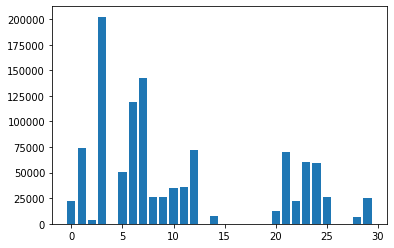

In [111]:
# representing importance of model features as a bar plot
importance = lasso.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], abs(importance))
plt.show()

## Comparing metrics acorss Linear Regression, Ridge Regression & Lasso Regression

In [112]:
# Linear
pd.DataFrame(metric, index=[0])

,R2 Score - Train,R2 Score - Test,RSS Score - Train,RSS Score - Test,MSE Score - Train,MSE Score - Test
0,0.781279,0.613819,1.390632e+12,1.066149e+12,37014.595814,49449.944176


In [113]:
# Ridge
pd.DataFrame(metric2, index=[0])

,R2 Score - Train,R2 Score - Test,RSS Score - Train,RSS Score - Test,MSE Score - Train,MSE Score - Test
0,0.741242,0.733655,1.645184e+12,7.353127e+11,40260.039969,41066.982896


In [114]:
# Lasso
pd.DataFrame(metric3, index=[0])

,R2 Score - Train,R2 Score - Test,RSS Score - Train,RSS Score - Test,MSE Score - Train,MSE Score - Test
0,0.741695,0.725299,1.642307e+12,7.583819e+11,40224.829175,41706.210259


## Lets observe the changes in the coefficients after regularization

In [115]:
betas = pd.DataFrame(index=X.columns)

In [116]:
betas.rows = X.columns

In [117]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [118]:
betas.head(30)

,Linear,Ridge,Lasso
1stFlrSF,2.669366e+04,23328.540390,22717.213787
Neighborhood_NoRidge,7.253352e+04,74797.969231,74129.334551
Neighborhood_StoneBr,6.801510e+03,11305.438919,3553.341391
Condition2_PosN,-3.676758e+05,-96897.816613,-202324.602548
Condition2_RRAe,-1.011358e-09,0.000000,0.000000
OverallQual_8,4.594173e+04,47797.287675,51018.173145
OverallQual_9,1.102853e+05,107923.020303,119018.756796
OverallQual_10,1.766808e+05,120388.637744,142235.592422
OverallCond_5,3.409834e+04,28575.615993,26294.516390
OverallCond_6,3.564073e+04,28438.828277,26488.854375


That's all, folks :) <br>
End of Notebook.